Dataset appears to be related to healthcare appointments, potentially for predicting no-shows.

Research Question


Which demographic factors affect biases in Machine Learning prediction models for no-show in healthcare appointments?

Which techniques can be used to mitigate these biases?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math


In [2]:
import pandas as pd
df = pd.read_csv(r"KaggleV2-May-2016.csv")

df


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


# General Data Overview

In [3]:
print("\nData Overview")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
print(df.head())


Data Overview
Shape of dataset: (110527, 14)
Columns: Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:

# Data Information and Summary

In [4]:

print("\nDataset Information")
df.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
print("\nSummary Statistics")
print(df.describe())


Summary Statistics
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172615e+12   5.640286e+06      18.000000       0.000000   
50%    3.173180e+13   5.680573e+06      37.000000       0.000000   
75%    9.439170e+13   5.725524e+06      55.000000       0.000000   
max    9.999820e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000  

# Check for Missing Values


In [6]:
print("\nMissing Values Count")
print(df.isnull().sum())


Missing Values Count
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


# Unique Values and Data Types

In [7]:

for column in df.columns:
    print(f"\nUnique values in {column}: {df[column].nunique()}")
    print(df[column].unique())


Unique values in PatientId: 61744
[2.98725e+13 5.58998e+14 4.26296e+12 ... 7.26331e+13 9.96998e+14
 1.55766e+13]

Unique values in AppointmentID: 110527
[5642903 5642503 5642549 ... 5630692 5630323 5629448]

Unique values in Gender: 2
['F' 'M']

Unique values in ScheduledDay: 103549
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']

Unique values in AppointmentDay: 27
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:0

In [8]:
#check the unique values of age
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Age contains extreme values: -1 and 115. They could be outlier. So, the presence of outliers is checked again.

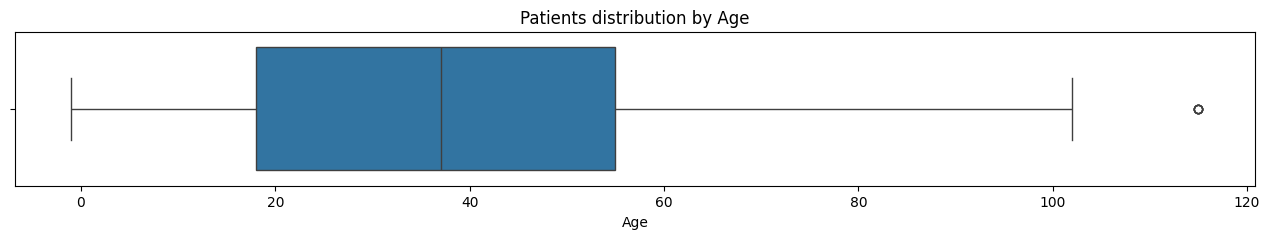

In [9]:
plt.figure(figsize=(16,2))
age = sns.boxplot(x=df.Age)
age.set_title("Patients distribution by Age")
plt.show()

It is found that the outliers are -1 and 115. So, the rows with them are removed from age. 

In [10]:
#remove rows with age greater than 102(outliers)
df = df.drop(df[df.Age > 102].index)

#remove rows with age less than 0(nonsense)
df = df.drop(df[df.Age <0].index)

In [11]:
#check the values of age again, it is found that there is no -1 and 115. 
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99])

In [12]:
#check the unique value of handcap
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

Check the values of Handcap which are found to be 0 to 4. So, it is converted to 0 or 1, meaning the absence or presence of handcap.  

In [13]:
df['Handcap'] = df['Handcap'].apply(lambda x: 1 if x > 0 else 0)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
#check the values of handcap again, it is found to be 0 and 1
df['Handcap'].unique()

array([0, 1])

In [15]:
#check the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The name of columns 'Hipertension' and 'Handcap' are changed into 'Hypertension' and 'Handicap'

In [16]:
df = df.rename(columns={'Hipertension': 'Hypertension'})
df = df.rename(columns={'Handcap': 'Handicap'})


### convert data type

Some data types are corrected as follows.

In [17]:
df["Neighbourhood"] = df["Neighbourhood"].astype("category")
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Hypertension'] = df['Hypertension'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Alcoholism'] = df['Alcoholism'].astype(bool)
df['Handicap'] = df['Handicap'].astype(bool)
df['SMS_received'] = df['SMS_received'].astype(bool)

df.dtypes

PatientId          float64
AppointmentID        int64
Gender              object
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship           bool
Hypertension          bool
Diabetes              bool
Alcoholism            bool
Handicap              bool
SMS_received          bool
No-show             object
dtype: object

In [18]:
#No-show is converted to boolean values: 0 and 1
#gender is converted to boolean values: 0 and 1
df['No-show']= df['No-show'].map({'Yes': 1, 'No': 0})
df['Gender']= df['Gender'].map({'M': 1, 'F': 0})

In [19]:
df['Gender'].unique()

array([0, 1])

In [20]:
#check the data type again
df.dtypes

PatientId          float64
AppointmentID        int64
Gender               int64
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship           bool
Hypertension          bool
Diabetes              bool
Alcoholism            bool
Handicap              bool
SMS_received          bool
No-show              int64
dtype: object

In [21]:
# Define age bins and corresponding labels for Medium Level classification
bins = [-1, 14, 24, 44, 64, 105]
labels = ['under 15', '15-24', '25-44', '45-64', '65+']

# Apply the binning and labeling to the 'Age' column
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Display the first few rows to check the result
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,age_group
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,False,False,0,45-64
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,False,False,0,45-64
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,False,False,0,45-64
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,False,False,0,under 15
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,False,False,0,45-64


In [22]:
df.dtypes

PatientId          float64
AppointmentID        int64
Gender               int64
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship           bool
Hypertension          bool
Diabetes              bool
Alcoholism            bool
Handicap              bool
SMS_received          bool
No-show              int64
age_group         category
dtype: object

Thus, most of the data types of columns are corrected. Schedule Day and Appointment Day are not so useful in data analysis  and model training. So, their types are left as object.

# Univariate Analysis - Categorical Features



Value counts for Neighbourhood:
Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64


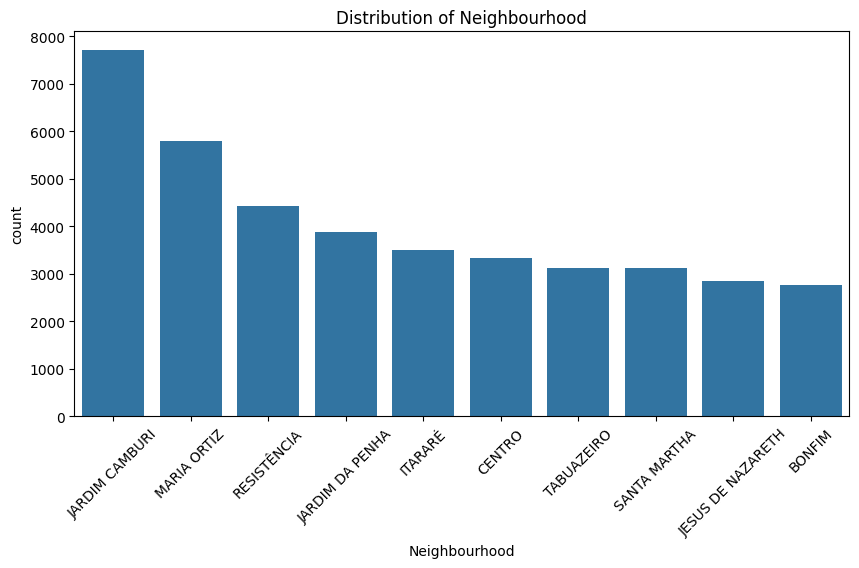


Value counts for age_group:
age_group
45-64       29992
25-44       28865
under 15    23257
65+         14397
15-24       14010
Name: count, dtype: int64


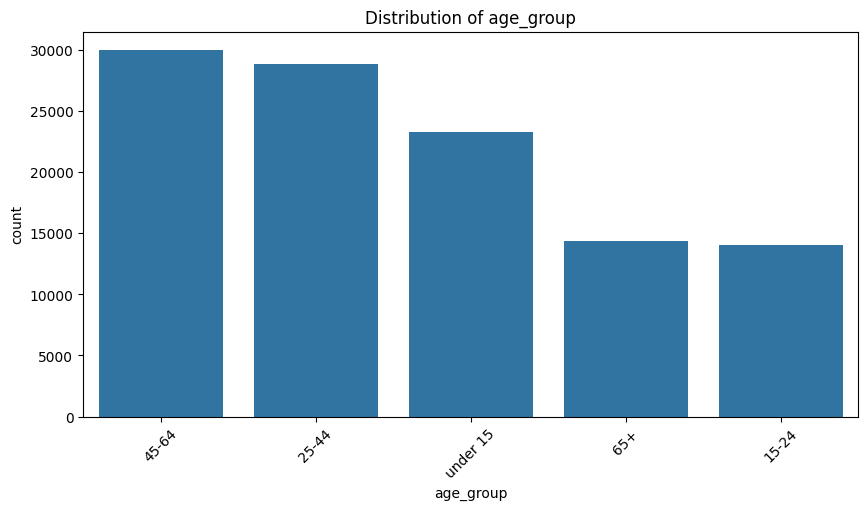

In [23]:
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    # Get the value counts for the column
    value_counts = df[col].value_counts()
    print(f"\nValue counts for {col}:")
    print(value_counts)
    
    # Plot the value counts, limiting to the top 10 categories for faster plotting
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=value_counts.index[:10])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show(block=False)
    plt.pause(0.1)
    plt.close()

# Univariate Analysis - Numerical Features

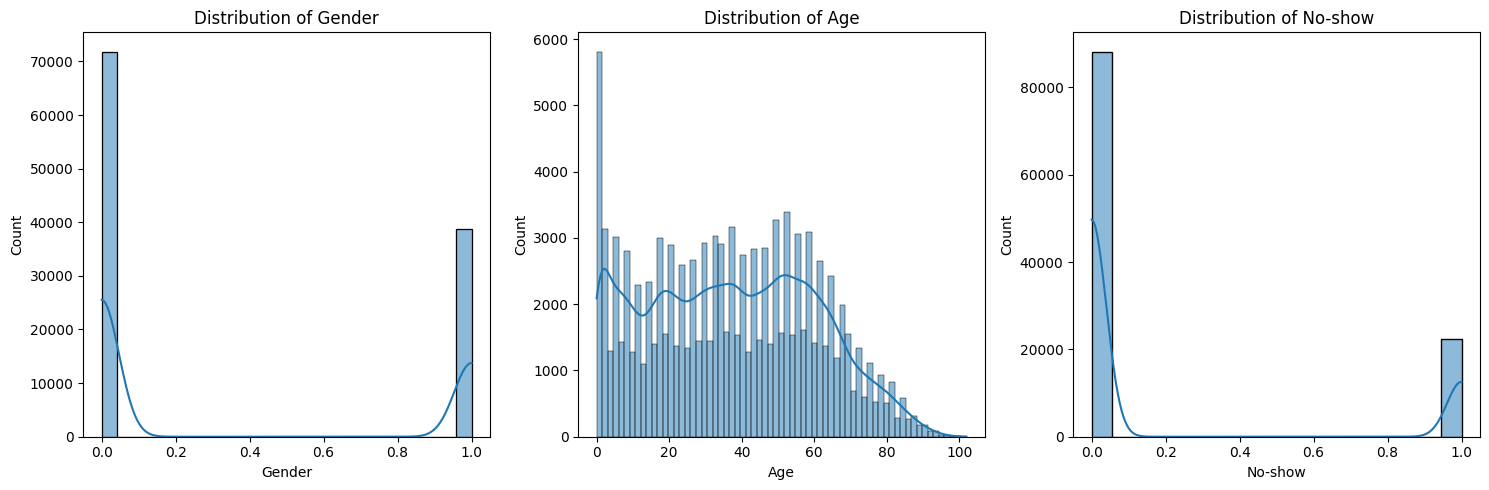

In [24]:
# Select numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# List of columns to exclude from plotting
exclude_cols = ['PatientId', 'AppointmentID']

# Filter out the columns you want to exclude
filtered_numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Set up the figure for subplots
num_plots = len(filtered_numerical_cols)
cols = 3  # Number of columns for the subplot grid
rows = math.ceil(num_plots / cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through each filtered numerical column and plot
for i, col in enumerate(filtered_numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Bivariate Analysis - Target vs Features


Feature: Gender, Unique values: [0, 1]
Categories (2, int64): [0, 1]
Target: No-show, Unique values: [0 1]


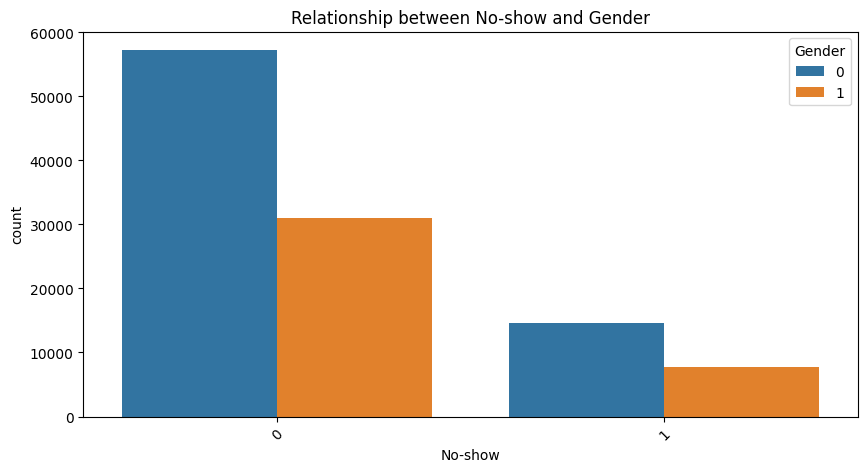

Feature: age_group, Unique values: ['45-64', 'under 15', '65+', '15-24', '25-44']
Categories (5, object): ['under 15' < '15-24' < '25-44' < '45-64' < '65+']
Target: No-show, Unique values: [0 1]


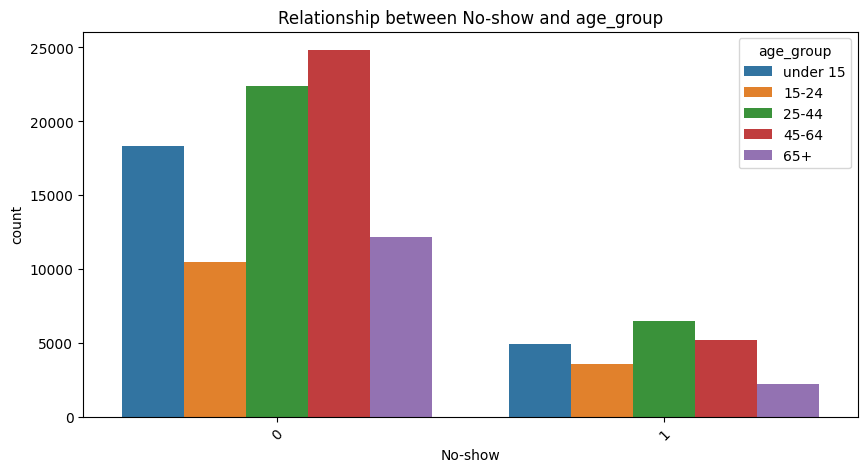

Feature: Scholarship, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: [0 1]


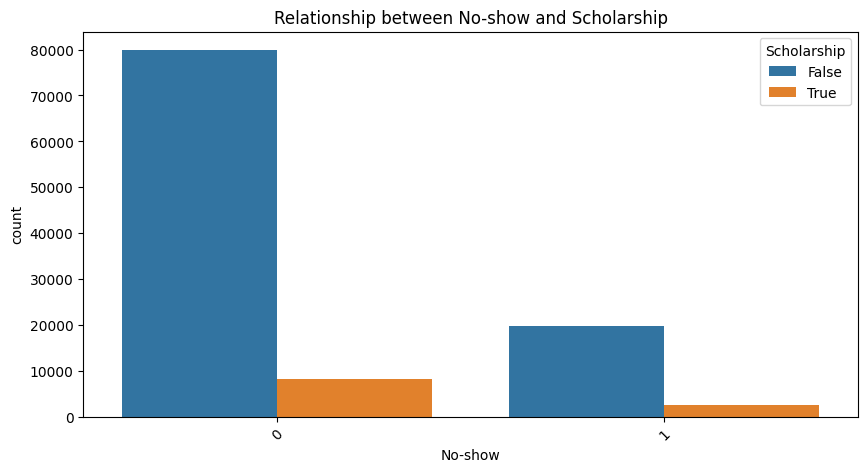

Feature: Hypertension, Unique values: [True, False]
Categories (2, bool): [False, True]
Target: No-show, Unique values: [0 1]


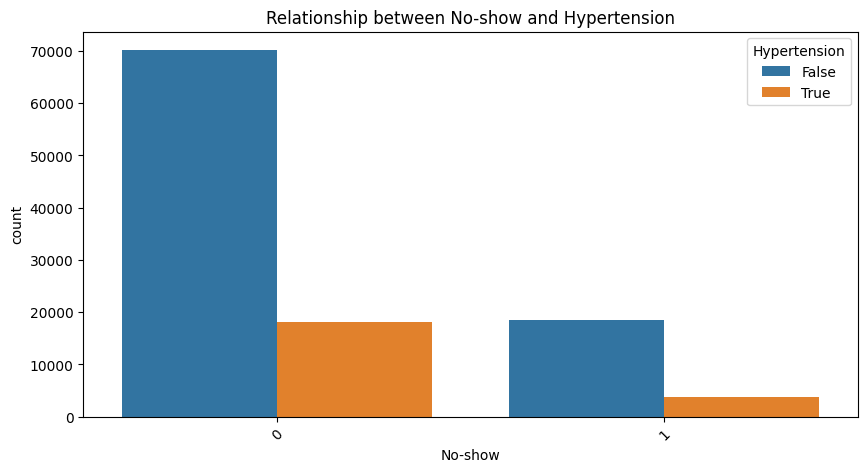

Feature: Diabetes, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: [0 1]


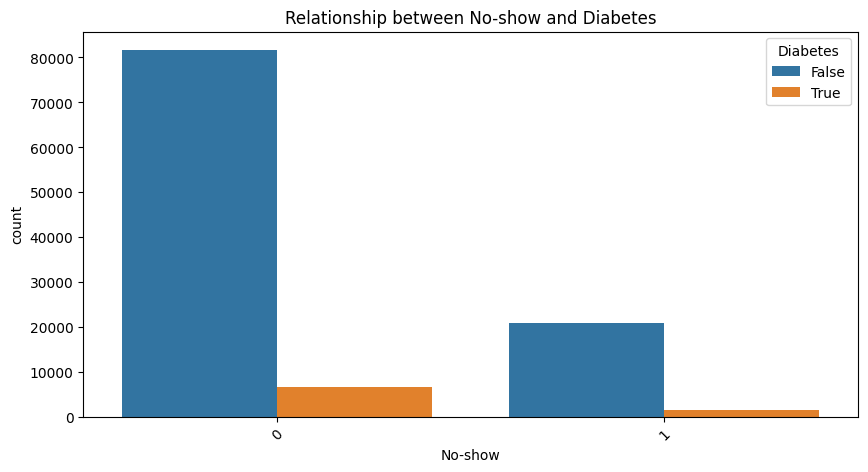

Feature: Alcoholism, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: [0 1]


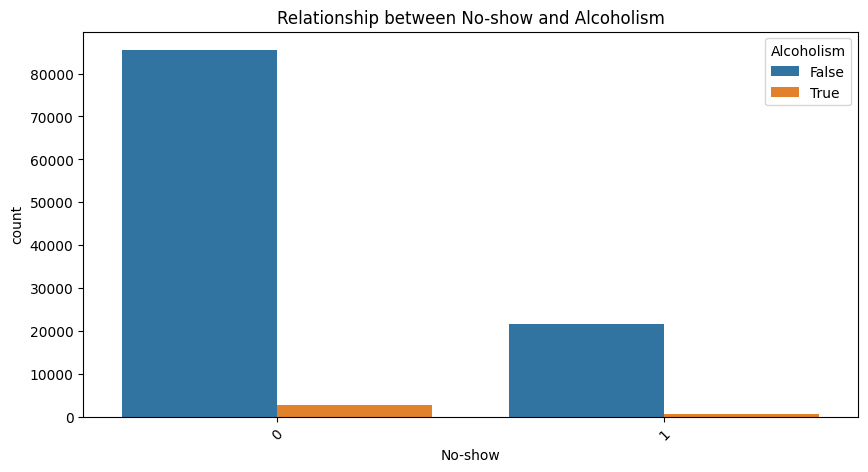

Feature: Handicap, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: [0 1]


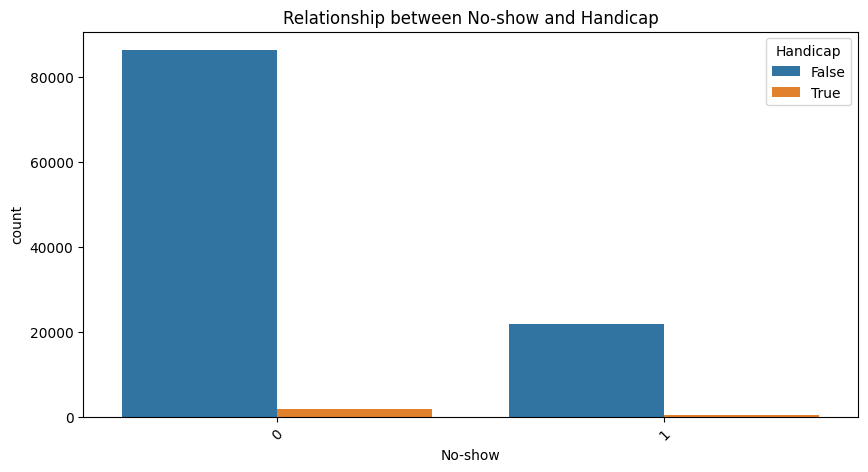

Feature: SMS_received, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: [0 1]


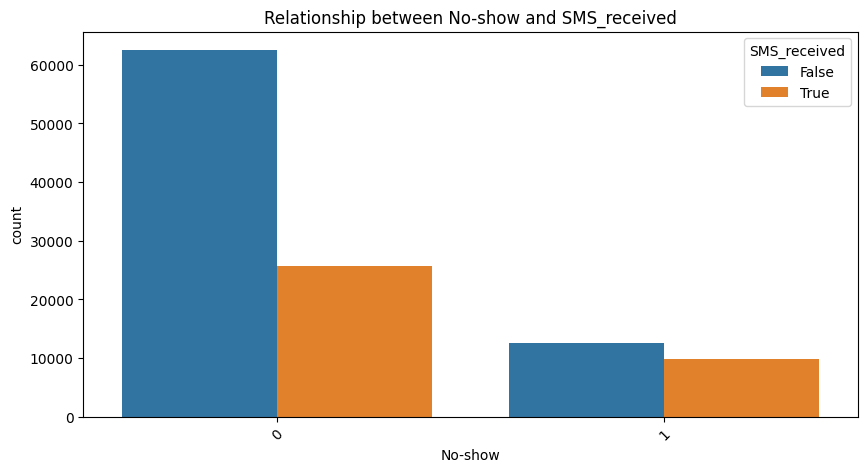

In [25]:
if 'No-show' in df.columns:
    target = 'No-show'
    features = ['Gender', 'age_group', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

    # Convert features to categorical where necessary
    for col in features:
        if col in df.columns:
            df[col] = df[col].astype('category')
    
    # Iterate through each feature
    for col in features:
        if col in df.columns:
            # Print unique values for each feature to check for issues
            print(f"Feature: {col}, Unique values: {df[col].unique()}")
            print(f"Target: {target}, Unique values: {df[target].unique()}")

            # Drop rows with NaN values in target and feature columns
            df_subset = df.dropna(subset=[target, col])

            # Proceed to plot only if data is available
            if not df_subset.empty:
                plt.figure(figsize=(10, 5))
                sns.countplot(x=target, hue=col, data=df_subset)  # Removed order to check the actual categories
                plt.title(f"Relationship between No-show and {col}")
                plt.xticks(rotation=45)
                plt.show()

Data types of some columns are converted in above analysis and so their data types are checked again.

In [26]:
df.dtypes

PatientId          float64
AppointmentID        int64
Gender            category
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship       category
Hypertension      category
Diabetes          category
Alcoholism        category
Handicap          category
SMS_received      category
No-show              int64
age_group         category
dtype: object

Some data types of some columns are encoded using label encoder for correlation matrix calculation.

In [27]:
# Define categorical columns, including 'No-show'
categorical_cols = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        # Only apply encoding if the column is not numeric
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            df[col] = le.fit_transform(df[col])

# Select all numerical columns, including encoded categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'bool', 'float64']).columns

In [28]:
df.dtypes

PatientId          float64
AppointmentID        int64
Gender               int64
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS_received         int64
No-show              int64
age_group         category
dtype: object

# Correlation Matrix for Numerical Features


0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int64


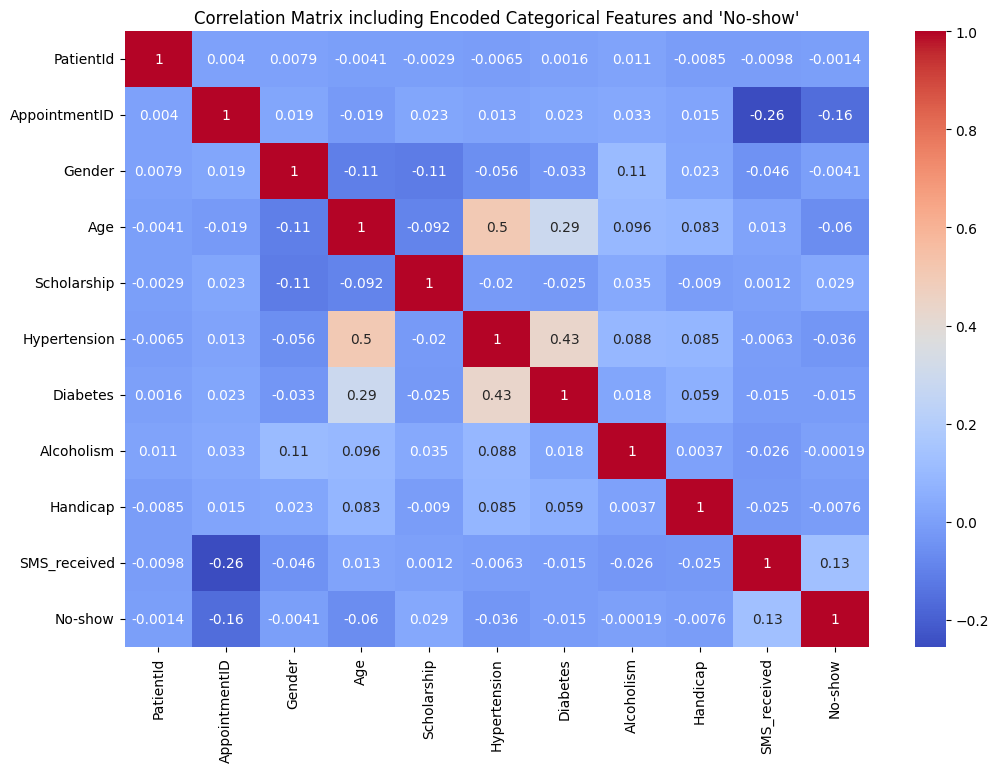

In [29]:
# Define categorical columns, including 'No-show'
categorical_cols = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        # Only apply encoding if the column is not numeric
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            df[col] = le.fit_transform(df[col])

# Explicitly check if 'No-show' is correctly encoded
print(df['No-show'].head())  # Check first few values to verify encoding

# Select all numerical columns, including encoded categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'bool', 'float64']).columns

# Make sure 'No-show' is in the numerical columns list
if 'No-show' not in numerical_cols:
    numerical_cols = numerical_cols.append(pd.Index(['No-show']))

# Correlation Matrix for Numerical Features including encoded categorical columns and 'No-show'
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix including Encoded Categorical Features and 'No-show'")
plt.show()


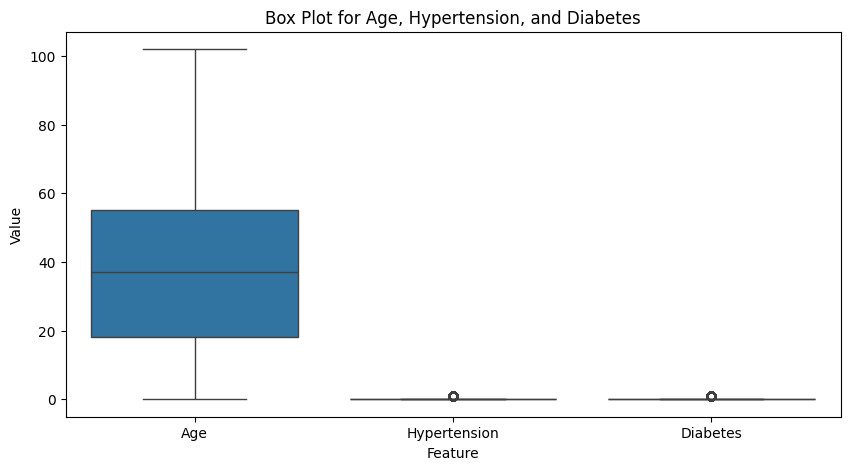

In [30]:
# Plot a combined box plot
df_melted = df[['Age', 'Hypertension', 'Diabetes']].melt(var_name='Feature', value_name='Value')
plt.figure(figsize=(10, 5))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title("Box Plot for Age, Hypertension, and Diabetes")
plt.show()

## Feature Engineering

Some features that would be used for model training are checked and processed to be ready for the training. 

In [31]:
#check the dataframe 
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,age_group
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,45-64
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,45-64
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,45-64
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,under 15
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,45-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0,45-64
110523,3.596270e+12,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0,45-64
110524,1.557660e+13,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0,15-24
110525,9.213490e+13,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0,25-44


In [32]:
#Check 
df.dtypes

PatientId          float64
AppointmentID        int64
Gender               int64
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS_received         int64
No-show              int64
age_group         category
dtype: object

In [33]:
#check null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
age_group         0
dtype: int64

So, the data types of features are appropiate. So, they are selected as features for ML training.

### Select features for ML model training

In [34]:
X = df[['Gender','age_group','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']]

Age group have 5 categories which are ordered so it needs ordinal encoding. Other features are binary having 2 values, 0 or 1. 

In [35]:
#check the values of age group
X['age_group'].unique()

['45-64', 'under 15', '65+', '15-24', '25-44']
Categories (5, object): ['under 15' < '15-24' < '25-44' < '45-64' < '65+']

In [36]:
# Indicate that the column is an ordered categorical feature
categ = ["under 15","15-24","25-44", "45-64","65+"]
X["age_group"] = pd.Categorical(X["age_group"], categories=categ, ordered=True)
print(X.dtypes)

Gender             int64
age_group       category
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
dtype: object


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18312\61986212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age_group"] = pd.Categorical(X["age_group"], categories=categ, ordered=True)


In [37]:
# Get the factors and replace with catgory of age group with ordinal codes
labels, unique = pd.factorize(X["age_group"], sort=True)
print(labels, unique)

[3 3 3 ... 1 2 3] CategoricalIndex(['under 15', '15-24', '25-44', '45-64', '65+'], categories=['under 15', '15-24', '25-44', '45-64', '65+'], ordered=True, dtype='category')


In [38]:
X["age_group"] = labels
X

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18312\1384787478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age_group"] = labels


,Gender,age_group,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,0,3,0,1,0,0,0,0
1,1,3,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,3,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
110522,0,3,0,0,0,0,0,1
110523,0,3,0,0,0,0,0,1
110524,0,1,0,0,0,0,0,1
110525,0,2,0,0,0,0,0,1


In [39]:
#check null values again
X.isnull().sum()

Gender          0
age_group       0
Scholarship     0
Hypertension    0
Diabetes        0
Alcoholism      0
Handicap        0
SMS_received    0
dtype: int64

In [40]:
#check the information of features
X.info

<bound method DataFrame.info of         Gender  age_group  Scholarship  Hypertension  Diabetes  Alcoholism  \
0            0          3            0             1         0           0   
1            1          3            0             0         0           0   
2            0          3            0             0         0           0   
3            0          0            0             0         0           0   
4            0          3            0             1         1           0   
...        ...        ...          ...           ...       ...         ...   
110522       0          3            0             0         0           0   
110523       0          3            0             0         0           0   
110524       0          1            0             0         0           0   
110525       0          2            0             0         0           0   
110526       0          3            0             0         0           0   

        Handicap  SMS_received 

### select target for model training

In [41]:
y = df['No-show']
y.shape

(110521,)

In [42]:
y.value_counts()

No-show
0    88205
1    22316
Name: count, dtype: int64

Check the target has class imbalance or not

In [43]:
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)

Class Counts:
 No-show
0    88205
1    22316
Name: count, dtype: int64

Class Percentages:
 No-show
0    79.808362
1    20.191638
Name: proportion, dtype: float64


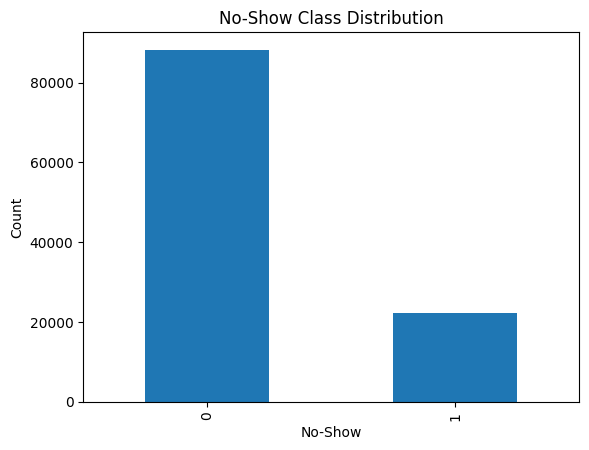

In [44]:
#visualize the class imbalance
class_counts.plot(kind='bar')
plt.title("No-Show Class Distribution")
plt.xlabel("No-Show")
plt.ylabel("Count")
plt.show()

So, it shows that no-show presence (1) has only 20 %, and there is class imbalance. To handle the class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) or SMOTETomek (ynthetic Minority Over-sampling Technique with Tomek Links ) will be used after spliting the data in following steps.

SMOTE is popular method to handle imbalanced data in which it creates synthetic data for minority class. It generates a new data point randomly in a position between original data and its nearest neighbours. By this way, it creates  data without duplicating existing ones. 

SMOTETomek contains 2 steps: first, SMOTE generates synthetic examples for the minority class and then Tomek Links is applied to clean up the data, removing noises and overlap from majority classes to achieve better balanced data. 

Both methods will be applied and ML models will be developed on each, and their performance will be compared. The method that give ML models having higer performance metrics will be chosen. 

By this way, we achieve a set of features and target that are in appropiate data types, forms and shape, necessary for ML model training.

## Machine Learning Model Development

### Dataset is split into training and testing set. Several classification models will be trained on training data and its performance will be measured on testing data. After comparing the performance metrics, one classficiation model will be chosen.

Verify scikit-learn Installation

In [45]:
!pip install -U scikit-learn




[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import the necessary ML modules and libraries 

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
print("Imports successful")

Imports successful


The dataset of features and target is split into training set (80%) and target set(20%)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape
print(X_test.shape, X_train.shape)
print(y_test.shape, y_train.shape)

(22105, 8) (88416, 8)
(22105,) (88416,)


As the target has class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) will be used in which samples of the minority class(presence of no-show) are duplicated to achieve a balanced number as the majority one(absence of no-show). It is a popular method to handle class imbalance. SMOTE create these synthetic data by using k-nearest neighbours(KNN) of existing sample without directly copying them.

In [48]:
#import necessary library for SMOTE
!pip install imblearn


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Class Counts:
 No-show
0    70544
1    70544
Name: count, dtype: int64

Class Percentages:
 No-show
0    50.0
1    50.0
Name: proportion, dtype: float64


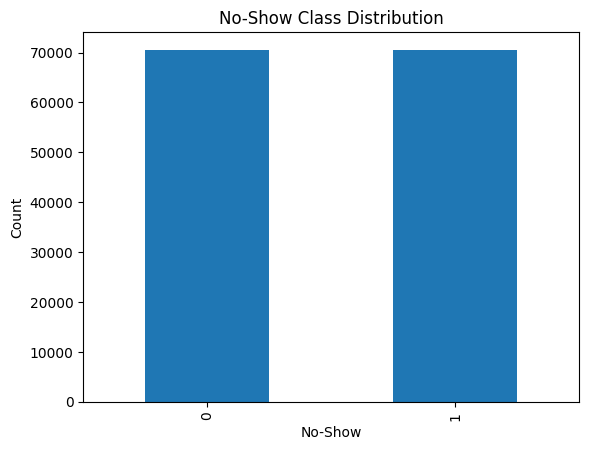

In [49]:
from imblearn.over_sampling import SMOTE
# Applying SMOTE to only the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#check the class imbalance in training data again
class_counts = y_train.value_counts()
class_percentages = y_train.value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)

#visualize the class imbalance
class_counts.plot(kind='bar')
plt.title("No-Show Class Distribution")
plt.xlabel("No-Show")
plt.ylabel("Count")
plt.show()

SMOTE technique is applied to training data as follows. It is not to testing data because it allows to evaluate the models without bias on naturally umbalanced data. 

### Logistic Regression

### Create performance metrics dataframe to store the metrics of trained models <br> A function for both training and testing is executed, so that the ML models can be trained easily

In [50]:
# Initialize an empty dataframe to store the performance metrics
performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [51]:
#write a function to train a ML model and test the performance, add the performance metrics into the performance_df dataframe
def evaluate_model(model_name, model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for handling imbalanced classes
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
  
    
    # Append the results to the performance dataframe
    performance_df.loc[len(performance_df)] = [model_name, accuracy, precision, recall, f1]
    return performance_df

Several ML models and their variants: Logistic Regression, Decision Trees, Random Forest, KNN, Gradient Boosting, Bagging, Adaboost, and Neural work are trained on the training set and their performance metrics are measured on testing data. Then, the metrics are compared.

In [52]:
log_reg = LogisticRegression(max_iter=1000)
evaluate_model('Logistic Regression', log_reg, X_train, X_test, y_train, y_test)

DT_gini = DecisionTreeClassifier( criterion='gini',max_depth = 5)
evaluate_model('DT_gini', DT_gini)

DT_entropy = DecisionTreeClassifier( criterion='entropy', max_depth = 5)
evaluate_model('DT_entropy', DT_entropy)

RF_gini = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=5)
evaluate_model('RF_gini', RF_gini)

RF_entropy = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=5)
evaluate_model('RF_entropy', RF_entropy)

KNN_5neighbours = KNeighborsClassifier(n_neighbors=5)
evaluate_model('KNN_5neighbours',KNN_5neighbours)

KNN_3neighbours = KNeighborsClassifier(n_neighbors=3)
evaluate_model('KNN_3neighbours',KNN_3neighbours)

gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
evaluate_model('Gradient Boosting', gradient_boosting)

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
evaluate_model('Bagging', bagging)

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0)
evaluate_model('Adaptive Boosting', adaboost)

neural_network = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, activation='relu', solver='adam')
evaluate_model('Neural Network', neural_network)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.637910,0.722418,0.637910,0.668272
1,DT_gini,0.664013,0.721708,0.664013,0.686854
2,DT_entropy,0.664103,0.721790,0.664103,0.686938
3,RF_gini,0.657905,0.722553,0.657905,0.682825
4,RF_entropy,0.683511,0.722353,0.683511,0.699985
5,KNN_5neighbours,0.784574,0.693500,0.784574,0.715822
6,KNN_3neighbours,0.770504,0.705906,0.770504,0.725186
7,Gradient Boosting,0.652839,0.722962,0.652839,0.679323
8,Bagging,0.646053,0.722541,0.646053,0.674318
9,Adaptive Boosting,0.581950,0.724177,0.581950,0.623188


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)
class_counts = y_train.value_counts()
class_percentages = y_train.value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)

Class Counts:
 No-show
0    70544
1    17872
Name: count, dtype: int64

Class Percentages:
 No-show
0    79.786464
1    20.213536
Name: proportion, dtype: float64


Then, SMOTETomek method  will be used to handle class imbalance.

Class Counts:
 No-show
0    70544
1    56435
Name: count, dtype: int64

Class Percentages:
 No-show
0    55.555643
1    44.444357
Name: proportion, dtype: float64


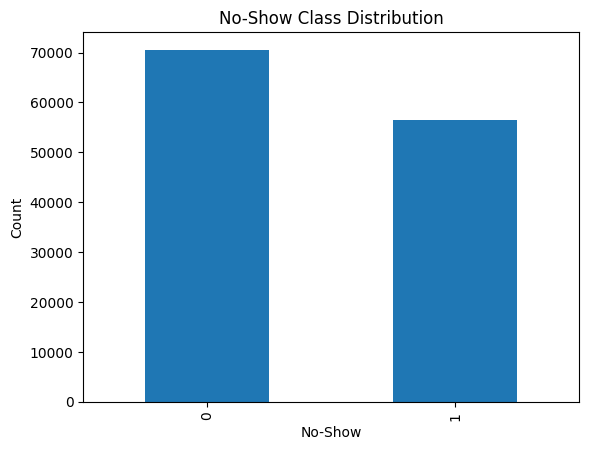

In [54]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy=0.8, random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

#check the class imbalance in training data again
class_counts = y_train.value_counts()
class_percentages = y_train.value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)

#visualize the class imbalance
class_counts.plot(kind='bar')
plt.title("No-Show Class Distribution")
plt.xlabel("No-Show")
plt.ylabel("Count")
plt.show()


In [64]:
performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

log_reg_smt = LogisticRegression(max_iter=1000)
evaluate_model('Logistic Regression', log_reg_smt, X_train, X_test, y_train, y_test)

DT_gini_smt = DecisionTreeClassifier( criterion='gini',max_depth = 5)
evaluate_model('DT_gini', DT_gini_smt)

DT_entropy_smt = DecisionTreeClassifier( criterion='entropy', max_depth = 5)
evaluate_model('DT_entropy', DT_entropy_smt)

RF_gini_smt = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=5)
evaluate_model('RF_gini', RF_gini_smt)

RF_entropy_smt = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=5)
evaluate_model('RF_entropy', RF_entropy_smt)

KNN_5neighbours_smt = KNeighborsClassifier(n_neighbors=5)
evaluate_model('KNN_5neighbours',KNN_5neighbours_smt)

KNN_3neighbours_smt = KNeighborsClassifier(n_neighbors=3)
evaluate_model('KNN_3neighbours',KNN_3neighbours_smt)

gradient_boosting_smt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
evaluate_model('Gradient Boosting', gradient_boosting_smt)

bagging_smt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
evaluate_model('Bagging', bagging_smt)

adaboost_smt = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0)
evaluate_model('Adaptive Boosting', adaboost_smt)

neural_network_smt = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, activation='relu', solver='adam')
evaluate_model('Neural Network', neural_network_smt)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.678127,0.721362,0.678127,0.696190
1,DT_gini,0.664013,0.721708,0.664013,0.686854
2,DT_entropy,0.664103,0.721790,0.664103,0.686938
3,RF_gini,0.638046,0.721579,0.638046,0.668215
4,RF_entropy,0.671432,0.721994,0.671432,0.691967
5,KNN_5neighbours,0.784574,0.693500,0.784574,0.715822
6,KNN_3neighbours,0.770504,0.705906,0.770504,0.725186
7,Gradient Boosting,0.652839,0.722962,0.652839,0.679323
8,Bagging,0.647953,0.721669,0.647953,0.675513
9,Adaptive Boosting,0.581950,0.724177,0.581950,0.623188


By comparing the performance metrics, SMOTETomek methods give better results and so ML models from this method will be used.

Among the ML models, 5 models are selected according to their higher performance and uses in previous studies. They are Logistic Regression, Decision Tree (DT_gini), Random Forest (RF_entropy), K Nearest Neighbours (KNN 5 neighbours) and Neural Network. 

Then, fairness metrics of 8 used features will be calculated for these 5 models.

## Bias Identification

4 fairness metrics: Demographic Parity Difference, Equalized Odds Difference, Disparate Impact, Negative Rate Difference will be used. 

<br> These metrics will be measured for each feature to detect that this feature has bias on these models.

### first, the required libraries for fairness metrics will be installed

In [56]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
pip install aif360

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
pip install aif360[inFairness]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import required modules

In [59]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from sklearn.metrics import accuracy_score, confusion_matrix

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\inFairness\utils\ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\inFairness\utils\ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the

 Select a feature to test as demographic data and integrated into the dataframe <br> The dataframe has actual target(no-show), predicted target, and this feature as demographic.

In [66]:
demographic_data = df['Gender']

Frist, Logistic Regression will be used for fairness metrics calculation. 

In [67]:
y_true = y
y_pred_all = log_reg_smt.predict(X)

In [68]:
# Create a dataframe for convenience
df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred_all,
    'demographic': demographic_data
})


In [69]:
df_results.head()

,y_true,y_pred,demographic
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [70]:
# Compute accuracy overall
accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
print("Overall accuracy:", accuracy)

Overall accuracy: 0.6805946381230716


### 2 Metrics Demographic Parity Difference, Equalized Odds Difference will be measured on that feature as follows.

In [71]:
# Fairness metrics: Demographic Parity and Equalized Odds
demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])
equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])

print(f"Demographic Parity Difference: {demographic_parity_diff}")
print(f"Equalized Odds Difference: {equalized_odds_diff}")


Demographic Parity Difference: 0.05475607108483968
Equalized Odds Difference: 0.07318118474858931


### Disparate Impact metrics is measured as follows.

In [72]:
# Additional bias metrics using AIF360
# Convert the dataframe to a BinaryLabelDataset object
dataset = BinaryLabelDataset(
    df=df_results,
    label_names=['y_true'],
    protected_attribute_names=['demographic']
)

# Compute metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=[{'demographic': 1}], unprivileged_groups=[{'demographic': 0}])

# Disparate impact
disparate_impact = metric.disparate_impact()
print(f"Disparate Impact: {disparate_impact}")

Disparate Impact: 1.017235651091653


### False Negative Rate Difference metrics is measured as follows.

In [74]:
# Calculate False Negative Rate (FNR) for privileged and unprivileged groups manually
# First, separate the privileged and unprivileged groups
privileged_group = df_results[df_results['demographic'] == 1]  # Assuming '1' represents privileged (e.g., Male)
unprivileged_group = df_results[df_results['demographic'] == 0]  # Assuming '0' represents unprivileged (e.g., Female)

# False Negative Rate (FNR) for Privileged Group
tn_priv, fp_priv, fn_priv, tp_priv = confusion_matrix(privileged_group['y_true'], privileged_group['y_pred']).ravel()
fnr_privileged = fn_priv / (fn_priv + tp_priv) if (fn_priv + tp_priv) > 0 else 0

# False Negative Rate (FNR) for Unprivileged Group
tn_unpriv, fp_unpriv, fn_unpriv, tp_unpriv = confusion_matrix(unprivileged_group['y_true'], unprivileged_group['y_pred']).ravel()
fnr_unprivileged = fn_unpriv / (fn_unpriv + tp_unpriv) if (fn_unpriv + tp_unpriv) > 0 else 0

# Difference in False Negative Rates
fnr_difference = fnr_privileged - fnr_unprivileged

print(f"False Negative Rate for Privileged Group: {fnr_privileged}")
print(f"False Negative Rate for Unprivileged Group: {fnr_unprivileged}")
print(f"False Negative Rate Difference: {fnr_difference}")

False Negative Rate for Privileged Group: 0.6533333333333333
False Negative Rate for Unprivileged Group: 0.5801521485847441
False Negative Rate Difference: 0.07318118474858926


### According to the results of 4 metrics, the feature 'Gender' has no bias on the model

### A function is structured and executed to calculate these 4 metrics on each feature easily.

In [75]:
def calculate_bias(y_true, y_pred, demographic_data):
    df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred,
    'demographic': demographic_data
    })
    accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
    print("Overall accuracy:", accuracy)
    demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])
    equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])

    print(f"Demographic Parity Difference: {demographic_parity_diff}")
    print(f"Equalized Odds Difference: {equalized_odds_diff}")

    # Additional bias metrics using AIF360
    # Convert the dataframe to a BinaryLabelDataset object
    dataset = BinaryLabelDataset(
    df=df_results,
    label_names=['y_true'],
    protected_attribute_names=['demographic']
    )

# Compute metrics
    metric = BinaryLabelDatasetMetric(dataset, privileged_groups=[{'demographic': 1}], unprivileged_groups=[{'demographic': 0}])

# Disparate impact
    disparate_impact = metric.disparate_impact()
    print(f"Disparate Impact: {disparate_impact}")

    # Calculate False Negative Rate (FNR) for privileged and unprivileged groups manually
    # First, separate the privileged and unprivileged groups
    privileged_group = df_results[df_results['demographic'] == 1]  # Assuming '1' represents privileged (e.g., Male)
    unprivileged_group = df_results[df_results['demographic'] == 0]  # Assuming '0' represents unprivileged (e.g., Female)

    # False Negative Rate (FNR) for Privileged Group
    tn_priv, fp_priv, fn_priv, tp_priv = confusion_matrix(privileged_group['y_true'], privileged_group['y_pred']).ravel()
    fnr_privileged = fn_priv / (fn_priv + tp_priv) if (fn_priv + tp_priv) > 0 else 0

    # False Negative Rate (FNR) for Unprivileged Group
    tn_unpriv, fp_unpriv, fn_unpriv, tp_unpriv = confusion_matrix(unprivileged_group['y_true'], unprivileged_group['y_pred']).ravel()
    fnr_unprivileged = fn_unpriv / (fn_unpriv + tp_unpriv) if (fn_unpriv + tp_unpriv) > 0 else 0

    # Difference in False Negative Rates
    fnr_difference = fnr_privileged - fnr_unprivileged

    print(f"False Negative Rate for Privileged Group: {fnr_privileged}")
    print(f"False Negative Rate for Unprivileged Group: {fnr_unprivileged}")
    print(f"False Negative Rate Difference: {fnr_difference}")

### Then, all binary features are used to measure the metrics, one by one.

In [78]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.05475607108483968
Equalized Odds Difference: 0.07318118474858931
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.6533333333333333
False Negative Rate for Unprivileged Group: 0.5801521485847441
False Negative Rate Difference: 0.07318118474858926


In [79]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.050910164811717895
Equalized Odds Difference: 0.07321340121927744
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.5407292474786657
False Negative Rate for Unprivileged Group: 0.613942648697943
False Negative Rate Difference: -0.07321340121927733


In [81]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.1268225673741279
Equalized Odds Difference: 0.18794833325251134
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.7616648992576882
False Negative Rate for Unprivileged Group: 0.5737165660051768
False Negative Rate Difference: 0.18794833325251137


In [83]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.09640054370014206
Equalized Odds Difference: 0.156277601551948
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.7517482517482518
False Negative Rate for Unprivileged Group: 0.5954706501963037
False Negative Rate Difference: 0.15627760155194803


In [84]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.0515898141248082
Equalized Odds Difference: 0.06026508596702962
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.621861152141802
False Negative Rate for Unprivileged Group: 0.6049725033504321
False Negative Rate Difference: 0.016888648791369976


In [85]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.1365216630048499
Equalized Odds Difference: 0.18751378149863182
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.7896039603960396
False Negative Rate for Unprivileged Group: 0.6020901788974078
False Negative Rate Difference: 0.18751378149863185


In [86]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.8622361263774978
Equalized Odds Difference: 0.8998364677023712
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.10016353229762878
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: -0.8998364677023712


#### age_group is not binary, and it is ordnial feature having 5 categories. So, ordinal encoding of age group needs to be done to measure the metrics.

In [ ]:
#check the values of age_group
print("Unique age_group values:", df['age_group'].unique())


Unique age_group values: ['45-64', 'under 15', '65+', '15-24', '25-44']
Categories (5, object): ['under 15' < '15-24' < '25-44' < '45-64' < '65+']


In [ ]:
#create a dataframe with age group
demographic_data = df['age_group']
df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred_all,
    'demographic_age_group': demographic_data
})

In [100]:
df_results

,y_true,y_pred,demographic_age_group
0,0,0,45-64
1,0,0,45-64
2,0,0,45-64
3,0,0,under 15
4,0,0,45-64
...,...,...,...
110522,0,1,45-64
110523,0,1,45-64
110524,0,1,15-24
110525,0,1,25-44


Ordinal encoding is done to the age_group required for the calculation of fairness metrics.

In [101]:
# Indicate that the column is an ordered categorical feature
categ = ['under 15', '15-24', '25-44', '45-64', '65+']
df_results['demographic_age_group'] = pd.Categorical(df_results['demographic_age_group'], categories=categ, ordered=True)
print(df_results.dtypes)

y_true                      int64
y_pred                      int64
demographic_age_group    category
dtype: object


In [102]:
labels, unique = pd.factorize(df_results["demographic_age_group"], sort=True)
print(labels, unique)

[3 3 3 ... 1 2 3] CategoricalIndex(['under 15', '15-24', '25-44', '45-64', '65+'], categories=['under 15', '15-24', '25-44', '45-64', '65+'], ordered=True, dtype='category')


In [103]:
df_results["demographic_age_group"] = labels
df_results

,y_true,y_pred,demographic_age_group
0,0,0,3
1,0,0,3
2,0,0,3
3,0,0,0
4,0,0,3
...,...,...,...
110522,0,1,3
110523,0,1,3
110524,0,1,1
110525,0,1,2


In [ ]:
#check the values of age group again
print("Unique values in demographic_age_group:", df_results['demographic_age_group'].unique())

Unique values in demographic_age_group: [3 0 4 1 2]


In [107]:
#check the data types
df_results.dtypes

y_true                   int64
y_pred                   int64
demographic_age_group    int64
dtype: object

By this way, apporpiate dataframe of age group as demographic is obtained.

#### Calculate Demographic Parity Difference, Equalized Odds Difference for age group as follows. 

In [108]:
accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
print("Overall accuracy:", accuracy)
demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])
equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])

print(f"Demographic Parity Difference: {demographic_parity_diff}")
print(f"Equalized Odds Difference: {equalized_odds_diff}")

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.3272220749744558
Equalized Odds Difference: 0.4597254447693404


#### To measure the Disparate Impact and False Negative Rate Difference, age group has 5 categories or subgroups. So, it is needed that one subgroup is selected as a reference group and the metrics of other 4 subgroups will be measured on this reference group. 

#### Calcuate the Disparate Impact

In [127]:
# Step 1: Calculate positive prediction rate for each age group
positive_rate_by_group = df_results[df_results['y_pred'] == 1].groupby('demographic_age_group').size() / df_results.groupby('demographic_age_group').size()

# Step 2: Choose the reference group (group with the highest positive outcome rate)
reference_group = positive_rate_by_group.idxmax()
reference_rate = positive_rate_by_group[reference_group]

# Step 3: Calculate disparate impact for each group relative to the reference group
disparate_impact_ratios = positive_rate_by_group / reference_rate

# Display the results
print("Positive prediction rates by age group:")
print(positive_rate_by_group)
print(f"\nReference group: {reference_group} with rate {reference_rate}")
print("\nDisparate Impact Ratios relative to the reference group:")
print(disparate_impact_ratios)

Positive prediction rates by age group:
demographic_age_group
0    0.293847
1    0.325268
2    0.337571
3    0.310383
4    0.010349
dtype: float64

Reference group: 2 with rate 0.3375714533171661

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.870474
1    0.963552
2    1.000000
3    0.919458
4    0.030658
dtype: float64


#### Calcuate the False Negative Rate Difference

In [134]:
# Step 1: Calculate false negative rate for each age group
fnr_by_group = (
    df_results[(df_results['y_true'] == 1) & (df_results['y_pred'] == 0)].groupby('demographic_age_group').size() / 
    df_results[df_results['y_true'] == 1].groupby('demographic_age_group').size()
).fillna(0)  # Fill NaN for groups with no positive cases

# Step 2: Choose the reference group (group with the lowest FNR)
reference_group = fnr_by_group.idxmin()
reference_fnr = fnr_by_group[reference_group]

# Step 3: Calculate FNR difference relative to the reference group
fnr_difference = fnr_by_group - reference_fnr

# Display the results
print("False Negative Rates by age group:")
print(fnr_by_group)
print(f"\nReference group: {reference_group} with FNR {reference_fnr}")
print("\nFalse Negative Rate Differences relative to the reference group:")
print(fnr_difference)


False Negative Rates by age group:
demographic_age_group
0    0.590946
1    0.534181
2    0.525925
3    0.603605
4    0.985650
dtype: float64

Reference group: 2 with FNR 0.5259247794459062

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.065021
1    0.008256
2    0.000000
3    0.077681
4    0.459725
dtype: float64


#### A function will be created to calcuate all 4 metrics of age group

In [149]:
#A function will be created to calcuate all fairness metrics of age_group column in just one cell
def age_group_fairness_metrics(y_true,y_pred,demographic_data):
    df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred,
    'demographic_age_group': demographic_data
    })
    categ = ['under 15', '15-24', '25-44', '45-64', '65+']
    df_results['demographic_age_group'] = pd.Categorical(df_results['demographic_age_group'], categories=categ, ordered=True)
    labels, unique = pd.factorize(df_results["demographic_age_group"], sort=True)
    df_results["demographic_age_group"] = labels
    accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
    print("Overall accuracy:", accuracy)

    #CALCULATE DEMOGRAPHIC PARITY DIFFERENCE AND EQUALIZED ODDS DIFFERENCE
    demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])
    equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])

    print(f"Demographic Parity Difference: {demographic_parity_diff}")
    print(f"Equalized Odds Difference: {equalized_odds_diff}")
    print('-------------------------')
    #CALCULATE DISPARATE IMPACT
    # Step 1: Calculate positive prediction rate for each age group
    positive_rate_by_group = df_results[df_results['y_pred'] == 1].groupby('demographic_age_group').size() / df_results.groupby('demographic_age_group').size()

    # Step 2: Choose the reference group (group with the highest positive outcome rate)
    reference_group = positive_rate_by_group.idxmax()
    reference_rate = positive_rate_by_group[reference_group]

    # Step 3: Calculate disparate impact for each group relative to the reference group
    disparate_impact_ratios = positive_rate_by_group / reference_rate

    # Display the results
    print('DISPARATE IMPACT')
    print("Positive prediction rates by age group:")
    print(positive_rate_by_group)
    print(f"\nReference group: {reference_group} with rate {reference_rate}")
    print("\nDisparate Impact Ratios relative to the reference group:") 
    print(disparate_impact_ratios)
    print('-------------------------')

    #CALCULATE FALSE NEGATIVE RATE DIFFERENCE
    # Step 1: Calculate false negative rate for each age group
    fnr_by_group = (
        df_results[(df_results['y_true'] == 1) & (df_results['y_pred'] == 0)].groupby('demographic_age_group').size() / 
        df_results[df_results['y_true'] == 1].groupby('demographic_age_group').size()
        ).fillna(0)  # Fill NaN for groups with no positive cases

    # Step 2: Choose the reference group (group with the lowest FNR)
    reference_group = fnr_by_group.idxmin()
    reference_fnr = fnr_by_group[reference_group]

    # Step 3: Calculate FNR difference relative to the reference group
    fnr_difference = fnr_by_group - reference_fnr

    # Display the results
    print('FALSE NEGATIVE RATE DIFFERENCE')
    print("False Negative Rates by age group:")
    print(fnr_by_group)
    print(f"\nReference group: {reference_group} with FNR {reference_fnr}")
    print("\nFalse Negative Rate Differences relative to the reference group:")
    print(fnr_difference)
    print('-------------------------')


In [ ]:
#calcuate the metrics of age group using the function
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.3272220749744558
Equalized Odds Difference: 0.4597254447693404
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.293847
1    0.325268
2    0.337571
3    0.310383
4    0.010349
dtype: float64

Reference group: 2 with rate 0.3375714533171661

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.870474
1    0.963552
2    1.000000
3    0.919458
4    0.030658
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.590946
1    0.534181
2    0.525925
3    0.603605
4    0.985650
dtype: float64

Reference group: 2 with FNR 0.5259247794459062

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.065021
1    0.008256
2    0.000000
3    0.077681
4    0.459725
dtype: float64
-------------------------


#### By this way, it can be seen how to calculate the fairness metrics step by step. From now, the fairness metrics of all 8 features for all 5 ML models: Logistic regression, Decision Tree (DT_gini), Random Forest (RF_entropy), K Nearest Neighbour(KNN 5neighbours) and Neural Network will be calculated as follows. 

#### Now, fairness metrics of features for the Logistics Regreession Model will be calculated using the functions. Although it is seen above, it will be calcuated again for better understanding and comparison.

In [189]:
y_true = y
y_pred_all = log_reg_smt.predict(X)

In [190]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.05475607108483968
Equalized Odds Difference: 0.07318118474858931
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.6533333333333333
False Negative Rate for Unprivileged Group: 0.5801521485847441
False Negative Rate Difference: 0.07318118474858926


In [191]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.050910164811717895
Equalized Odds Difference: 0.07321340121927744
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.5407292474786657
False Negative Rate for Unprivileged Group: 0.613942648697943
False Negative Rate Difference: -0.07321340121927733


In [192]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.1268225673741279
Equalized Odds Difference: 0.18794833325251134
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.7616648992576882
False Negative Rate for Unprivileged Group: 0.5737165660051768
False Negative Rate Difference: 0.18794833325251137


In [193]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.09640054370014206
Equalized Odds Difference: 0.156277601551948
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.7517482517482518
False Negative Rate for Unprivileged Group: 0.5954706501963037
False Negative Rate Difference: 0.15627760155194803


In [194]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.0515898141248082
Equalized Odds Difference: 0.06026508596702962
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.621861152141802
False Negative Rate for Unprivileged Group: 0.6049725033504321
False Negative Rate Difference: 0.016888648791369976


In [195]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.1365216630048499
Equalized Odds Difference: 0.18751378149863182
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.7896039603960396
False Negative Rate for Unprivileged Group: 0.6020901788974078
False Negative Rate Difference: 0.18751378149863185


In [196]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.8622361263774978
Equalized Odds Difference: 0.8998364677023712
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.10016353229762878
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: -0.8998364677023712


In [197]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.6805946381230716
Demographic Parity Difference: 0.3272220749744558
Equalized Odds Difference: 0.4597254447693404
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.293847
1    0.325268
2    0.337571
3    0.310383
4    0.010349
dtype: float64

Reference group: 2 with rate 0.3375714533171661

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.870474
1    0.963552
2    1.000000
3    0.919458
4    0.030658
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.590946
1    0.534181
2    0.525925
3    0.603605
4    0.985650
dtype: float64

Reference group: 2 with FNR 0.5259247794459062

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.065021
1    0.008256
2    0.000000
3    0.077681
4    0.459725
dtype: float64
-------------------------


### Now, fairness metrics of features for the Decision Tree Model will be calculated using the functions.  

In [151]:
y_true = y
y_pred_all = DT_gini_smt.predict(X)

In [152]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6655658200703939
Demographic Parity Difference: 0.04269283544224922
Equalized Odds Difference: 0.06165359281855487
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.6186407766990292
False Negative Rate for Unprivileged Group: 0.5569871838804743
False Negative Rate Difference: 0.06165359281855487


In [154]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6655658200703939
Demographic Parity Difference: 0.012484122658231234
Equalized Odds Difference: 0.034617099205173474
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.547711404189294
False Negative Rate for Unprivileged Group: 0.5823285033944675
False Negative Rate Difference: -0.03461709920517353


In [155]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6655658200703939
Demographic Parity Difference: 0.011023565369182808
Equalized Odds Difference: 0.024279914467376817
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.5946447507953341
False Negative Rate for Unprivileged Group: 0.5750107851596203
False Negative Rate Difference: 0.019633965635713735


In [156]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6655658200703939
Demographic Parity Difference: 0.021317770198275632
Equalized Odds Difference: 0.06424914738617699
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.6384615384615384
False Negative Rate for Unprivileged Group: 0.5742123910753615
False Negative Rate Difference: 0.06424914738617693


In [157]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6655658200703939
Demographic Parity Difference: 0.06949836772084372
Equalized Odds Difference: 0.0775470449990383
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.6144756277695717
False Negative Rate for Unprivileged Group: 0.5771985766440224
False Negative Rate Difference: 0.03727705112554924


In [158]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6655658200703939
Demographic Parity Difference: 0.06085100279440342
Equalized Odds Difference: 0.07904209095608361
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.655940594059406
False Negative Rate for Unprivileged Group: 0.5768985031033224
False Negative Rate Difference: 0.07904209095608361


In [160]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6655658200703939
Demographic Parity Difference: 0.9417561800997549
Equalized Odds Difference: 0.9599542913395999
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.039247751430907606
False Negative Rate for Unprivileged Group: 0.9992020427705075
False Negative Rate Difference: -0.9599542913395999


In [161]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.6655658200703939
Demographic Parity Difference: 0.16913358431667988
Equalized Odds Difference: 0.24851468243750185
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.294707
1    0.323626
2    0.337571
3    0.330388
4    0.168438
dtype: float64

Reference group: 2 with rate 0.3375714533171661

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.873021
1    0.958689
2    1.000000
3    0.978721
4    0.498970
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.589931
1    0.535876
2    0.525925
3    0.577244
4    0.774439
dtype: float64

Reference group: 2 with FNR 0.5259247794459062

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.064006
1    0.009951
2    0.000000
3    0.051319
4    0.248515
dtype: float64
-------------------------


### Now, fairness metrics of features for the Random Forest Model will be calculated using the functions.  

In [162]:
y_true = y
y_pred_all = RF_entropy_smt.predict(X)

In [163]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6733019064250233
Demographic Parity Difference: 0.005185998346844689
Equalized Odds Difference: 0.013649288174494234
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.5981877022653722
False Negative Rate for Unprivileged Group: 0.5845384140908779
False Negative Rate Difference: 0.01364928817449429


In [164]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6733019064250233
Demographic Parity Difference: 0.1567585836406899
Equalized Odds Difference: 0.1776703048885317
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.4321179208688906
False Negative Rate for Unprivileged Group: 0.6097882257574222
False Negative Rate Difference: -0.17767030488853158


In [165]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6733019064250233
Demographic Parity Difference: 0.20675334356573316
Equalized Odds Difference: 0.2773386068913396
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.8197242841993637
False Negative Rate for Unprivileged Group: 0.5423856773080241
False Negative Rate Difference: 0.2773386068913396


In [166]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6733019064250233
Demographic Parity Difference: 0.11674185046453209
Equalized Odds Difference: 0.17734568409661775
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.7552447552447552
False Negative Rate for Unprivileged Group: 0.5778990711481375
False Negative Rate Difference: 0.17734568409661766


In [167]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6733019064250233
Demographic Parity Difference: 0.02749854635726129
Equalized Odds Difference: 0.04547605011700609
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.5465288035450517
False Negative Rate for Unprivileged Group: 0.5906003050048524
False Negative Rate Difference: -0.044071501459800655


In [168]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6733019064250233
Demographic Parity Difference: 0.14335097839623606
Equalized Odds Difference: 0.14099468471033919
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.7227722772277227
False Negative Rate for Unprivileged Group: 0.586801752464403
False Negative Rate Difference: 0.13597052476331972


In [169]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.6733019064250233
Demographic Parity Difference: 0.8457904814096424
Equalized Odds Difference: 0.8714964262216445
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.09985690923957481
False Negative Rate for Unprivileged Group: 0.9713533354612193
False Negative Rate Difference: -0.8714964262216445


In [170]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.6733019064250233
Demographic Parity Difference: 0.25510133981109606
Equalized Odds Difference: 0.3731113830273813
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.333663
1    0.341256
2    0.346648
3    0.275340
4    0.091547
dtype: float64

Reference group: 2 with rate 0.34664818984929846

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.962541
1    0.984445
2    1.000000
3    0.794293
4    0.264092
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.545270
1    0.517232
2    0.514781
3    0.644892
4    0.887892
dtype: float64

Reference group: 2 with FNR 0.5147809936542331

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.030489
1    0.002451
2    0.000000
3    0.130111
4    0.373111
dtype: float64
-------------------------


### Now, fairness metrics of features for the K Nearest Neighbours (5 neighbours) Model will be calculated using the functions.  

In [171]:
y_true = y
y_pred_all = KNN_5neighbours_smt.predict(X)

In [172]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7849458473955176
Demographic Parity Difference: 0.003438373059641297
Equalized Odds Difference: 0.0250659991451928
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.9403236245954693
False Negative Rate for Unprivileged Group: 0.9653896237406621
False Negative Rate Difference: -0.025065999145192808


In [173]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7849458473955176
Demographic Parity Difference: 0.034149699808924044
Equalized Odds Difference: 0.04798091617725171
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.9142746314972847
False Negative Rate for Unprivileged Group: 0.9622555476745365
False Negative Rate Difference: -0.04798091617725175


In [174]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7849458473955176
Demographic Parity Difference: 0.014199187350429222
Equalized Odds Difference: 0.0141675180459651
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.9660657476139979
False Negative Rate for Unprivileged Group: 0.9548101811906816
False Negative Rate Difference: 0.011255566423316266


In [175]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7849458473955176
Demographic Parity Difference: 0.018339794826868063
Equalized Odds Difference: 0.018657489897060404
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.9706293706293706
False Negative Rate for Unprivileged Group: 0.9557598391266877
False Negative Rate Difference: 0.014869531502682887


In [176]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7849458473955176
Demographic Parity Difference: 0.02766285186819476
Equalized Odds Difference: 0.06960721051621672
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.8892171344165436
False Negative Rate for Unprivileged Group: 0.9588243449327603
False Negative Rate Difference: -0.06960721051621666


In [177]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7849458473955176
Demographic Parity Difference: 0.13209072875088468
Equalized Odds Difference: 0.2533789523530666
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.7079207920792079
False Negative Rate for Unprivileged Group: 0.9612997444322745
False Negative Rate Difference: -0.2533789523530666


In [178]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7849458473955176
Demographic Parity Difference: 0.08566157348757307
Equalized Odds Difference: 0.08607928904639452
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.9102616516762061
False Negative Rate for Unprivileged Group: 0.992977976380466
False Negative Rate Difference: -0.08271632470425994


In [179]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.7849458473955176
Demographic Parity Difference: 0.08243136907540151
Equalized Odds Difference: 0.09853512242825703
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.020467
1    0.074590
2    0.007448
3    0.011803
4    0.089880
dtype: float64

Reference group: 4 with rate 0.08987983607696048

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.227715
1    0.829881
2    0.082871
3    0.131321
4    1.000000
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.963662
1    0.897175
2    0.987773
3    0.981198
4    0.889238
dtype: float64

Reference group: 4 with FNR 0.889237668161435

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.074425
1    0.007937
2    0.098535
3    0.091960
4    0.000000
dtype: float64
-------------------------


### Now, fairness metrics of features for the Neural Network Model will be calculated using the functions.  

In [180]:
y_true = y
y_pred_all = neural_network_smt.predict(X)

In [181]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.64932456275278
Demographic Parity Difference: 0.04169406390804842
Equalized Odds Difference: 0.043071815106657196
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.5143042071197411
False Negative Rate for Unprivileged Group: 0.5532177369611404
False Negative Rate Difference: -0.038913529841399286


In [182]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.64932456275278
Demographic Parity Difference: 0.19692768875182892
Equalized Odds Difference: 0.2015050772568278
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.36152055857253684
False Negative Rate for Unprivileged Group: 0.5630256358293647
False Negative Rate Difference: -0.20150507725682787


In [183]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.64932456275278
Demographic Parity Difference: 0.12547468463399694
Equalized Odds Difference: 0.1723034470422357
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.6829268292682927
False Negative Rate for Unprivileged Group: 0.510623382226057
False Negative Rate Difference: 0.17230344704223577


In [184]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.64932456275278
Demographic Parity Difference: 0.049771109533479796
Equalized Odds Difference: 0.08604626246108577
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.6202797202797202
False Negative Rate for Unprivileged Group: 0.5342334578186345
False Negative Rate Difference: 0.08604626246108571


In [185]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.64932456275278
Demographic Parity Difference: 0.07898988271319385
Equalized Odds Difference: 0.09399580117325224
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.5583456425406204
False Negative Rate for Unprivileged Group: 0.5391653958131152
False Negative Rate Difference: 0.01918024672750518


In [186]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.64932456275278
Demographic Parity Difference: 0.1371315841633485
Equalized Odds Difference: 0.136556107459306
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.6584158415841584
False Negative Rate for Unprivileged Group: 0.5375593282219788
False Negative Rate Difference: 0.12085651336217962


In [187]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.64932456275278
Demographic Parity Difference: 0.8269354419335758
Equalized Odds Difference: 0.8337370966466484
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.07154538021259199
False Negative Rate for Unprivileged Group: 0.9052824768592403
False Negative Rate Difference: -0.8337370966466484


In [188]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.64932456275278
Demographic Parity Difference: 0.5297505621784457
Equalized Odds Difference: 0.6024435661624992
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.335641
1    0.596431
2    0.348276
3    0.327021
4    0.066681
dtype: float64

Reference group: 1 with rate 0.5964311206281228

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.562749
1    1.000000
2    0.583934
3    0.548296
4    0.111799
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.544458
1    0.295763
2    0.512614
3    0.581702
4    0.898206
dtype: float64

Reference group: 1 with FNR 0.2957627118644068

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.248695
1    0.000000
2    0.216851
3    0.285939
4    0.602444
dtype: float64
-------------------------


### SHAP visualization is done to know the impact of each feature on the model.(It is optional)

In [142]:
import shap

c:\Users\drpra\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [143]:
# Create a SHAP explainer for linear models
explainer = shap.LinearExplainer(log_reg, X_train)  # For linear models

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

In [144]:
shap_values.shape

(22106, 8)

In [145]:
feat_names=list(X.columns)

In [146]:
feat_names

['Gender',
 'age_group',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received']

In [147]:
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

# Create SHAP explainer for linear models
explainer = shap.LinearExplainer(log_reg, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

### Visulization 

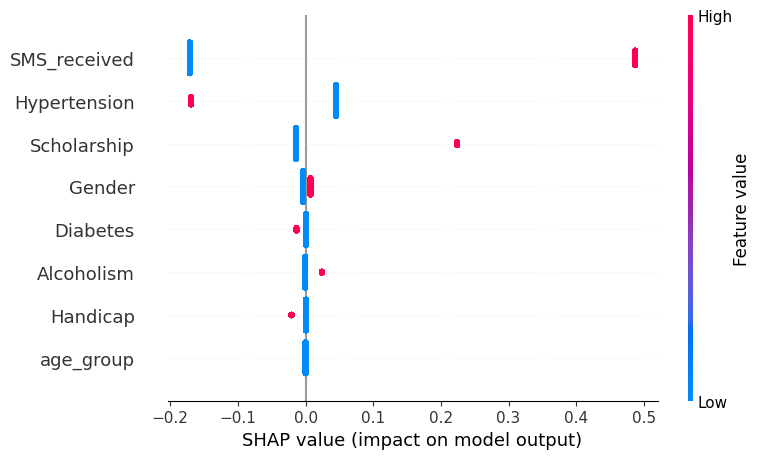

In [148]:
shap.summary_plot(shap_values, X_test, feature_names=feat_names)

This SHAP summary plot shows the impact of features on the model’s predictions:

Y-axis: Lists features, ordered by their overall impact.
X-axis (SHAP values): Indicates impact direction; positive values increase predictions, negative values decrease them.
Color: Represents feature values (red = high, blue = low).
Key insights:

SMS_received: Lower values reduce predictions.
Scholarship: Higher values increase predictions.
Gender, Alcoholism, Handicap: Vary in impact, depending on value.